In [5]:
import json
import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from collections import defaultdict
import numpy as np

In [ ]:
with open("english_texts.json", "r") as file:
    texts = json.load(file)

In [13]:
n_topics = [3, 5, 7, 9]
decays = [0.5, 0.7, 0.9]
models = {}
for n_topic in n_topics:
    for decay in decays:
        with open(f"model_{n_topic}_{decay}.p", "rb") as file:
            model = pickle.load(file)
            models[(n_topic, decay)] = model

In [9]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)

In [14]:
scores_by_decays = defaultdict(list)
topics_by_decays = defaultdict(list)
for n_topic, decay in models:
    model = models[(n_topic, decay)]
    scores_by_decays[decay].append(model.score(X))
    topics_by_decays[decay].append(n_topic)

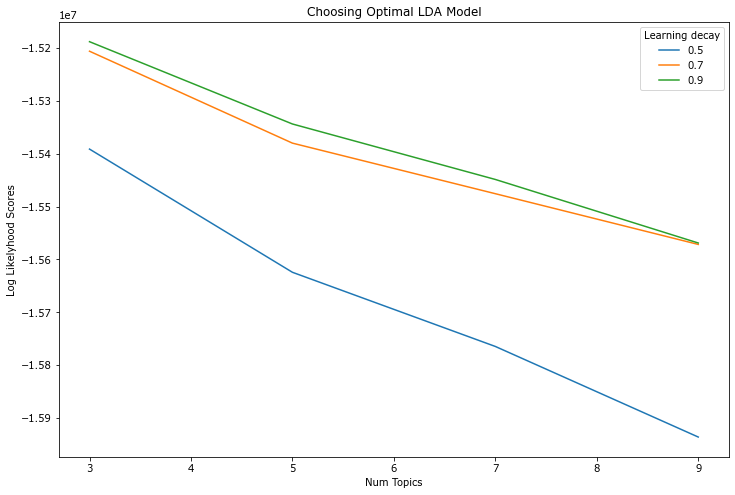

In [15]:
plt.figure(figsize=(12, 8))

for decay in scores_by_decays:
    scores = scores_by_decays[decay]
    topics = topics_by_decays[decay]
    plt.plot(topics, scores, label=str(decay))

plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.savefig("optimal_model.png")

In [51]:
from collections import defaultdict

counter = defaultdict(lambda: defaultdict(int))
n = X.shape[0]
transformed = model.transform(X)
for i in range(n):
    counted_words = defaultdict(int)
    text = texts[i]
    topic = transformed[i].argmax()
    for word in text.split():
        counter[topic][word] += 1

top_words_by_topic = dict()

for topic in counter:
    items = list(counter[topic].items())
    items.sort(key=lambda x: x[1], reverse=True)
    top_words_by_topic[topic] = items
    
top_words_by_topic

{0: [('deal', 269196),
  ('email', 229240),
  ('support', 165006),
  ('free', 142361),
  ('user', 141211),
  ('field', 132701),
  ('contact', 130329),
  ('new', 122212),
  ('team', 115397),
  ('time', 106069),
  ('conversation', 105421),
  ('account', 96092),
  ('detail', 90289),
  ('reply', 90169),
  ('feature', 88363),
  ('back', 87086),
  ('way', 85953),
  ('delay', 84581),
  ('message', 83444),
  ('activity', 82735),
  ('check', 81155),
  ('query', 79813),
  ('hope', 75333),
  ('case', 74260),
  ('apology', 74164),
  ('able', 73078),
  ('agent', 72798),
  ('automation', 71908),
  ('add', 70650),
  ('explain', 70104),
  ('create', 69211),
  ('option', 67521),
  ('make', 67454),
  ('send', 66071),
  ('look', 66021),
  ('use', 65408),
  ('reaching', 63917),
  ('link', 63566),
  ('open', 63262),
  ('data', 62604),
  ('name', 61318),
  ('find', 60764),
  ('assist', 59947),
  ('another', 59740),
  ('issue', 59186),
  ('pipeline', 58852),
  ('information', 58130),
  ('best', 56928),
  ('p

In [54]:
for topic in top_words_by_topic:
    with open(f"{topic}_words.txt", "w", encoding="utf-8") as file:
        for word, count in top_words_by_topic[topic]:
            file.write(f"{word.ljust(20)} {count}\n")

In [19]:
with open("ids_by_lems.json") as file:
    ids_by_lems = json.loads(file.read())


In [18]:
with open("english_texts_by_id.json") as file:
    english_texts_by_ids = json.loads(file.read())

In [42]:
import os
import re
import pandas as pd
from datetime import datetime

full_texts_by_id = {}

for file_path in os.listdir("cleaned_intercom_messages"):
    csv = pd.read_csv(f"cleaned_intercom_messages/{file_path}")
    csv = csv[csv['clean_body'].notna()]
    bodies = csv["clean_body"]
    dates = csv["created_date"]
    ids = zip(csv["key_intercomconversation"], csv["key_iteration"])
    for id, body, date in zip(ids, bodies, dates):
        m = re.search(" Selected category: (.+) Content: (.+) uid:", body)
        if m is not None:
            pass
        else:
            full_texts_by_id["_".join(map(str, id))] = (datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%fZ"), body)


In [43]:
texts_by_topic = defaultdict(list)
for i, text in enumerate(texts):
    topic = transformed[i].argmax()
    id = ids_by_lems[text]
    full_text = full_texts_by_id[id]
    texts_by_topic[topic].append(full_text)
    
for topic in texts_by_topic:
    texts_by_topic[topic].sort(key=lambda x: x[0])
    texts_by_topic[topic] = list(map(lambda x: x[1], texts_by_topic[topic]))

In [48]:
texts_by_topic = dict(texts_by_topic)

for topic in texts_by_topic:
    with open(f"{topic}.txt", "w", encoding="utf-8") as file:
        for text in texts_by_topic[topic]:
            file.write(text)
            file.write("\n\n")